In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVsCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    #print(str(e))
        np .random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:", self.dogcount)
        
if REBUILD_DATA:
    dogsvscats = DogsVsCats()
    dogsvscats.make_training_data()

PetImages/Cat


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:14<00:00, 167.65it/s]


PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:52<00:00, 239.40it/s]


Cats: 12476
Dogs: 12470


In [8]:
training_data = np.load("training_data.npy", allow_pickle=True)

In [9]:
print(len(training_data))

24946


In [12]:
print(training_data[1])

[array([[ 78,  86,  64, ..., 112,  82,  53],
        [ 89,  69,  72, ..., 133, 145, 138],
        [ 87,  69,  63, ..., 114, 105, 115],
        ...,
        [117, 124, 127, ...,  98,  91,  78],
        [126, 124, 123, ..., 117, 109, 103],
        [115, 120, 123, ..., 117,  97, 100]], dtype=uint8) array([0., 1.])]


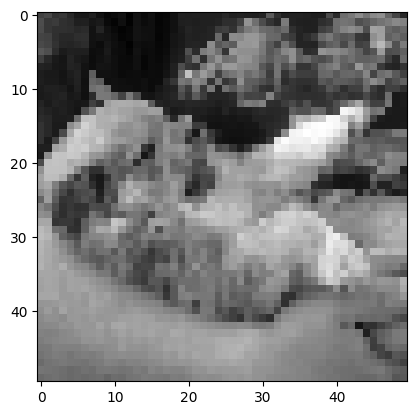

In [19]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap = "gray")
plt.show()

In [20]:
training_data[1][1]

array([0., 1.])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5) #input=1, convolutional_feature = 32, kernel_size = 5(5*5)
        self.conv2 = nn.Conv2d(1,32,5)
        self.conv3 = nn.Conv2d(1,32,5)